In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [13]:
def to_date(date):
    #2017-08-17 04-AM
    #
    try:
        return datetime.datetime.strptime(date, '%Y-%m-%d %I-%p')
    except:
        return datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    
    

def read_data(tik):
    usd = 'USDT'
    time = '1h'
    name = f'Binance_{tik + usd}_{time}.csv'
    dfh = pd.read_csv(f'../data/{name}', skiprows=1).iloc[::-1]
    dfh.head()
    dfh.reset_index(inplace=True, drop=True)
    dfh['date'] = dfh['date'].apply(lambda x:to_date(x))
    return dfh

In [38]:
df = read_data('XRP')

In [39]:
df.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT,tradecount
0,1596322800000,2020-08-01 23:00:00,XRP/USDT,0.29387,0.29388,0.28839,0.29089,20421227.0,5.950241e+06,10755
1,1596326400000,2020-08-02 00:00:00,XRP/USDT,0.29089,0.29423,0.28927,0.29085,24221327.4,7.058562e+06,11871
2,1596330000000,2020-08-02 01:00:00,XRP/USDT,0.29084,0.29509,0.29018,0.29465,21380106.2,6.275030e+06,10559
3,1596333600000,2020-08-02 02:00:00,XRP/USDT,0.29464,0.31500,0.29374,0.31217,58395375.2,1.769345e+07,26673
4,1596337200000,2020-08-02 03:00:00,XRP/USDT,0.31217,0.32562,0.30800,0.32452,82957807.2,2.627919e+07,41032


In [40]:
symbol = "XRP"

new_naming = {col:f"{col}_{symbol}" for col in df.columns if col != "date"}
df.rename(new_naming,axis=1,inplace=True)

In [41]:
df.head()

,unix_XRP,date,symbol_XRP,open_XRP,high_XRP,low_XRP,close_XRP,Volume XRP_XRP,Volume USDT_XRP,tradecount_XRP
0,1596322800000,2020-08-01 23:00:00,XRP/USDT,0.29387,0.29388,0.28839,0.29089,20421227.0,5.950241e+06,10755
1,1596326400000,2020-08-02 00:00:00,XRP/USDT,0.29089,0.29423,0.28927,0.29085,24221327.4,7.058562e+06,11871
2,1596330000000,2020-08-02 01:00:00,XRP/USDT,0.29084,0.29509,0.29018,0.29465,21380106.2,6.275030e+06,10559
3,1596333600000,2020-08-02 02:00:00,XRP/USDT,0.29464,0.31500,0.29374,0.31217,58395375.2,1.769345e+07,26673
4,1596337200000,2020-08-02 03:00:00,XRP/USDT,0.31217,0.32562,0.30800,0.32452,82957807.2,2.627919e+07,41032


In [43]:
df.set_index(["date"],inplace=True)

In [44]:
df2 = read_data('BTC')

In [45]:
symbol = "BTC"

new_naming = {col:f"{col}_{symbol}" for col in df2.columns if col != "date"}
df2.rename(new_naming,axis=1,inplace=True)

In [47]:
df2.set_index(["date"],inplace=True)

In [48]:
df2.head()

,unix_BTC,symbol_BTC,open_BTC,high_BTC,low_BTC,close_BTC,Volume BTC_BTC,Volume USDT_BTC,tradecount_BTC
date,,,,,,,,,
2017-08-17 04:00:00,1.502942e+09,BTC/USDT,16199.91,16199.91,4261.32,4308.83,44.5100,190952.85,NaN
2017-08-17 05:00:00,1.502946e+09,BTC/USDT,4308.83,4328.69,4291.37,4315.32,23.2300,100304.82,NaN
2017-08-17 06:00:00,1.502950e+09,BTC/USDT,4315.32,4345.45,4309.37,4324.35,7.2300,31282.31,NaN
2017-08-17 07:00:00,1.502953e+09,BTC/USDT,4324.35,4349.99,4287.41,4349.99,4.4400,19241.06,NaN
2017-08-17 08:00:00,1.502957e+09,BTC/USDT,4349.99,4377.85,4333.32,4360.69,0.9499,4139.70,NaN


In [56]:
pd.concat([df, df2] ,axis=1)

,unix_XRP,symbol_XRP,open_XRP,high_XRP,low_XRP,close_XRP,Volume XRP_XRP,Volume USDT_XRP,tradecount_XRP,unix_BTC,symbol_BTC,open_BTC,high_BTC,low_BTC,close_BTC,Volume BTC_BTC,Volume USDT_BTC,tradecount_BTC
date,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.502942e+09,BTC/USDT,16199.91,16199.91,4261.32,4308.83,44.51000,1.909529e+05,NaN
2017-08-17 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.502946e+09,BTC/USDT,4308.83,4328.69,4291.37,4315.32,23.23000,1.003048e+05,NaN
2017-08-17 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.502950e+09,BTC/USDT,4315.32,4345.45,4309.37,4324.35,7.23000,3.128231e+04,NaN
2017-08-17 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.502953e+09,BTC/USDT,4324.35,4349.99,4287.41,4349.99,4.44000,1.924106e+04,NaN
2017-08-17 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.502957e+09,BTC/USDT,4349.99,4377.85,4333.32,4360.69,0.94990,4.139700e+03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25 20:00:00,1.637870e+12,XRP/USDT,1.0546,1.0564,1.0501,1.0510,6114807.0,6.442205e+06,9744.0,1.637870e+12,BTC/USDT,58853.84,59088.69,58806.53,58864.05,1196.70072,7.053881e+07,51287.0
2021-11-25 21:00:00,1.637874e+12,XRP/USDT,1.0511,1.0541,1.0433,1.0447,10019477.0,1.050730e+07,13834.0,1.637874e+12,BTC/USDT,58864.05,59050.03,58702.96,58809.31,932.08404,5.486410e+07,52593.0
2021-11-25 22:00:00,1.637878e+12,XRP/USDT,1.0448,1.0475,1.0401,1.0454,6758678.0,7.060672e+06,10772.0,1.637878e+12,BTC/USDT,58809.31,58900.01,58519.54,58874.34,917.85548,5.391814e+07,46689.0


In [6]:

df['up_scale'] = (df["high"] - df["open"])/df["open"]

In [9]:
np.average(df.up_scale)

0.010289157166508505

In [11]:
np.max(df.up_scale)

0.35567482654797755

In [13]:
np.min(df.up_scale)

0.0

## technnique
### buy in the mid day if the linner line going up from 0 to 5 , and sell when its 0.01 up


In [51]:
init_idx = df[df.date.dt.hour == 0].iloc[0].name
last_idx = df[df.date.dt.hour == 23].iloc[-1].name

In [55]:
df = df.iloc[init_idx:last_idx+1]

In [57]:
df.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT,tradecount
1,1596326400000,2020-08-02 00:00:00,XRP/USDT,0.29089,0.29423,0.28927,0.29085,24221327.4,7.058562e+06,11871
2,1596330000000,2020-08-02 01:00:00,XRP/USDT,0.29084,0.29509,0.29018,0.29465,21380106.2,6.275030e+06,10559
3,1596333600000,2020-08-02 02:00:00,XRP/USDT,0.29464,0.31500,0.29374,0.31217,58395375.2,1.769345e+07,26673
4,1596337200000,2020-08-02 03:00:00,XRP/USDT,0.31217,0.32562,0.30800,0.32452,82957807.2,2.627919e+07,41032
5,1596340800000,2020-08-02 04:00:00,XRP/USDT,0.32443,0.32628,0.24760,0.27713,138231434.2,4.076270e+07,66349


In [66]:
df.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT,tradecount,pre
1,1596326400000,2020-08-02 00:00:00,XRP/USDT,0.29089,0.29423,0.28927,0.29085,24221327.4,7.058562e+06,11871,None
2,1596330000000,2020-08-02 01:00:00,XRP/USDT,0.29084,0.29509,0.29018,0.29465,21380106.2,6.275030e+06,10559,None
3,1596333600000,2020-08-02 02:00:00,XRP/USDT,0.29464,0.31500,0.29374,0.31217,58395375.2,1.769345e+07,26673,None
4,1596337200000,2020-08-02 03:00:00,XRP/USDT,0.31217,0.32562,0.30800,0.32452,82957807.2,2.627919e+07,41032,None
5,1596340800000,2020-08-02 04:00:00,XRP/USDT,0.32443,0.32628,0.24760,0.27713,138231434.2,4.076270e+07,66349,None


In [82]:
from sklearn.linear_model import LinearRegression
df["Buy"] = 0
def linner_reg(x,y):
    x = x.reshape(-1, 1)  # values converts it into a numpy array
    y = y.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(x, y)  # perform linear regression
    
    return linear_regressor.intercept_ , linear_regressor.coef_  # make predictions

for idx,row in df[df.date.dt.hour == 5].iterrows():
    prices = df.iloc[idx-6:idx].close.values
    x = np.array(range(0,6))
    intercept,coef = linner_reg(y = prices ,x = x)
    if intercept > 0.20 and coef >=0 :
        df["Buy"].iloc[idx + 1] = 1
        
   
    

/home/ashraf/Desktop/python-env/crypto/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/ashraf/Desktop/python-env/crypto/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/ashraf/Desktop/python-env/crypto/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [93]:
df.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT,tradecount,pre
1,1596326400000,2020-08-02 00:00:00,XRP/USDT,0.29089,0.29423,0.28927,0.29085,24221327.4,7.058562e+06,11871,None
2,1596330000000,2020-08-02 01:00:00,XRP/USDT,0.29084,0.29509,0.29018,0.29465,21380106.2,6.275030e+06,10559,None
3,1596333600000,2020-08-02 02:00:00,XRP/USDT,0.29464,0.31500,0.29374,0.31217,58395375.2,1.769345e+07,26673,None
4,1596337200000,2020-08-02 03:00:00,XRP/USDT,0.31217,0.32562,0.30800,0.32452,82957807.2,2.627919e+07,41032,None
5,1596340800000,2020-08-02 04:00:00,XRP/USDT,0.32443,0.32628,0.24760,0.27713,138231434.2,4.076270e+07,66349,None


AttributeError: 'DataFrame' object has no attribute 'B'

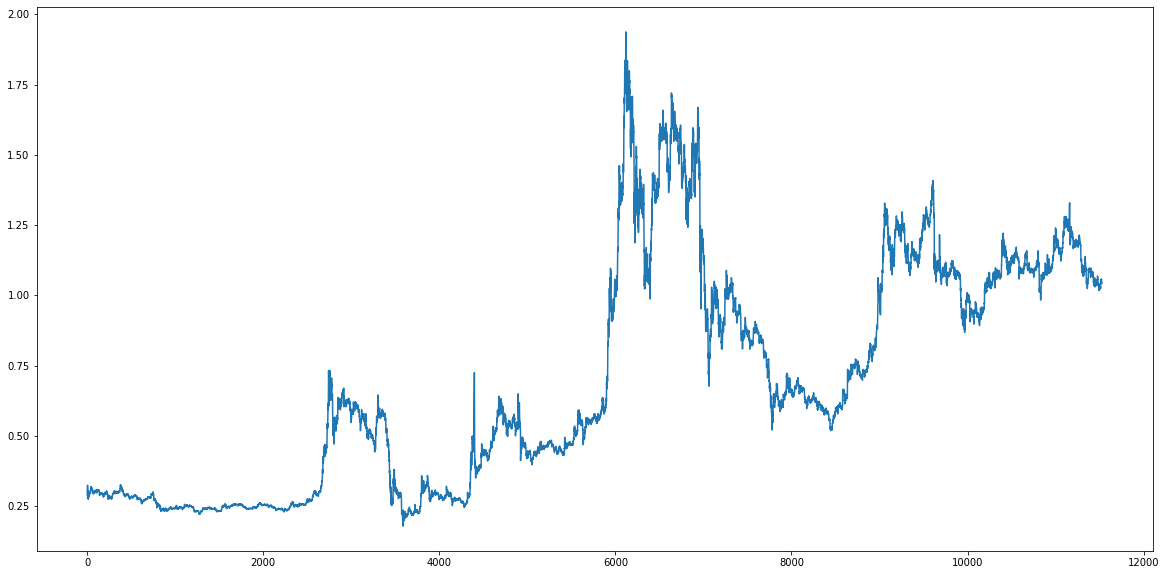

In [94]:
fig = plt.figure(figsize=(20,10))
df.close.plot()
df.B